In [10]:
import pandas as pd
import numpy as np

In [11]:
train = pd.read_json("yelp_review_training_dataset.jsonl",lines=True)

In [12]:
train.head()

,review_id,text,stars
0,Q1sbwvVQXV2734tPgoKj4Q,Total bill for this horrible service? Over $8G...,1
1,GJXCdrto3ASJOqKeVWPi6Q,I *adore* Travis at the Hard Rock's new Kelly ...,5
2,2TzJjDVDEuAW6MR5Vuc1ug,I have to say that this office really has it t...,5
3,yi0R0Ugj_xUx_Nek0-_Qig,Went in for a lunch. Steak sandwich was delici...,5
4,11a8sVPMUFtaC7_ABRkmtw,Today was my second out of three sessions I ha...,1


In [16]:
train['len'] = train['text'].str.split().apply(len)

In [17]:
train['len'].value_counts()

40      5141
34      5060
33      5033
28      5033
37      5032
        ... 
859        1
1008       1
1049       1
1004       1
927        1
Name: len, Length: 1007, dtype: int64

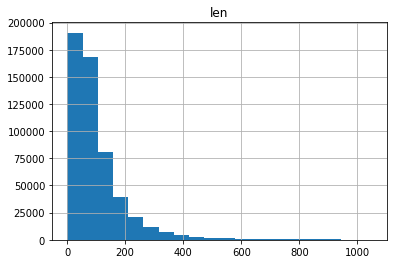

In [20]:
hist = train.hist(column='len',bins=20)

In [21]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-nli-stsb-mean-tokens')
text_batch = ["I love Pixar.", "I don't care for Pixar."]
encoding = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True)
input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

In [22]:
input_ids

tensor([[  101,  1045,  2293, 14255, 18684,  2099,  1012,   102,     0,     0,
             0,     0],
        [  101,  1045,  2123,  1005,  1056,  2729,  2005, 14255, 18684,  2099,
          1012,   102]])

In [24]:
from transformers import AutoTokenizer, AutoModel  
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/bert-base-nli-stsb-mean-tokens")
text_batch = ["I love Pixar.", "I don't care for Pixar."]
encoding = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True)
input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [25]:
input_ids

tensor([[  101,  1045,  2293, 14255, 18684,  2099,  1012,   102,     0,     0,
             0,     0],
        [  101,  1045,  2123,  1005,  1056,  2729,  2005, 14255, 18684,  2099,
          1012,   102]])